<a href="https://colab.research.google.com/github/erick-huang15/Python_Exercises/blob/main/Regression_Metrics_Exerciseipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd # this is to import all the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/CD:Week6: Regression Models/Boston_Housing_from_Sklearn.csv'
data = pd.read_csv(path)
data.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


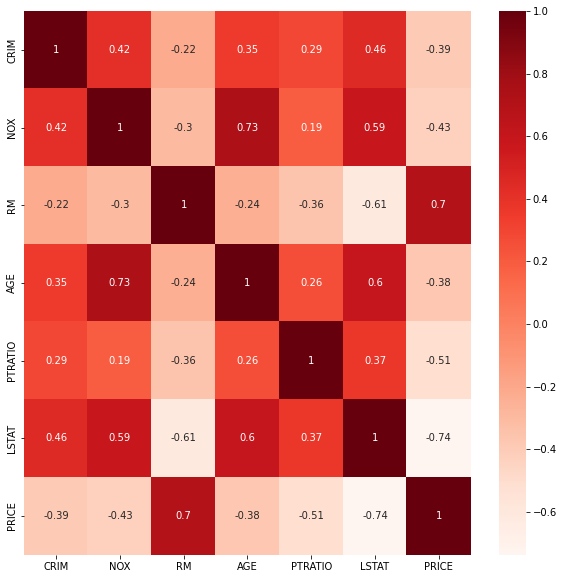

In [5]:
correlation = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cmap='Reds',annot=True)

Correlations coefficient of magnitute 0.5 with price:
- RM, AGE, PTRATIO

In [10]:
data['PTRATIO'] = data['PTRATIO'].astype('object')

In [11]:
X = data.drop(columns='PRICE')
y = data['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [34]:
pipeline = make_pipeline(StandardScaler(),LinearRegression())
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [38]:
def eval_model(true, pred):
  mae = mean_absolute_error(true, pred)
  mse = mean_squared_error(true, pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(true, pred)

  print(f'MAE: {mae:,.2f} \n MSE: {mse:,.2f} \n RMSE: {rmse:,.2f} \n R2: {r2:,.2f} ')

In [40]:
print('Train Evaluation')

eval_model(y_train, pipeline.predict(X_train))

print('\n Test Evaluation')

eval_model(y_test, pipeline.predict(X_test))

Train Evaluation
MAE: 3.67 
 MSE: 27.01 
 RMSE: 5.20 
 R2: 0.70 

 Test Evaluation
MAE: 3.34 
 MSE: 25.52 
 RMSE: 5.05 
 R2: 0.64 
